In [33]:
import numpy as np
#from numpy.random import randint as rnd
import matplotlib.pyplot as plt
from numpy.random import uniform

def all_args_max(arr):
    return np.where(arr >= np.max(arr))

In [34]:
BigCity = 10000
NSmallCities = 50
SizeSmallCity = BigCity / NSmallCities
n_good = 200
Iterations = 10000

In [35]:
class Country():
    def __init__(self, size_big = BigCity, 
                 size_small = SizeSmallCity, n_small = NSmallCities):
        
        self.size_big = size_big
        self.size_small = size_small
        self.n_small = n_small
        
        self.n_cities = n_small + 1
        self.pop = self.size_big + self.size_small*self.n_small
        
        self.cities_totals = np.zeros(self.n_cities)
        
        # keep track of number of times given city places 1 in a given iteration
        self.top_finishes = np.zeros(self.n_cities)
        
        # Cities sizes
        self.cities_pops = np.full((self.n_small+1), self.size_small)
        # First city is the big one:
        self.cities_pops[0] = self.size_big
        
        self.scores = np.zeros(self.n_cities)
    
    def addSmartOne(self, ind, verbose = False):
        if ind < self.size_big:
            city_ind = 0
        else:
            city_ind = int(np.floor((ind-self.size_big)/self.size_small))+1
        
        self.cities_totals[city_ind] += 1
        if verbose:
            print(f"ind = {ind}, city_ind = {city_ind}")
        
    
    def print(self):
        print(f"Big/Small = {self.size_big/self.size_small}")
        print(f"Total population = {self.pop}")       
        print(f"Populations:\t{self.cities_pops}")
        print(f"Scores:\t\t{self.scores}")
        self.printTopFinishes()
    
    
    def printTopFinishes(self):
        print(f"Totals:\t\t{self.cities_totals}")
        print(int(self.pop))
        means = [self.top_finishes[i]/self.cities_pops[i] for i in range(int(self.n_cities))]
        #print(f"Standing:\t{self.top_finishes}")
        print(f"Standing:\t{means}")

        
    def computeTopFinishes(self):
        for city_ind in range(self.n_cities):
            p = self.cities_pops[city_ind]
            s = self.cities_totals[city_ind]
            s_bar = s/n_good
            mu =  p/self.pop
            #print(f's_bar = {s_bar}, mu = {mu}')
            self.scores[city_ind] = np.sqrt(n_good)*(s_bar-mu)/p
            
            
        self.top_finishes[all_args_max(self.scores)] += 1
        self.cities_totals = np.zeros(self.n_cities)
        self.scores = np.zeros(self.n_cities)
        
    def rnd(self):
        return int(np.floor(uniform()*self.pop))

In [36]:
def oneIteration(country, tries = n_good, verbose = False):
    for i in range(tries):
        #ind = rnd(1, country.pop)
        ind = country.rnd()
        country.addSmartOne(ind)
    if verbose:
        country.print()
        print()
    country.computeTopFinishes()

Totals:		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
20000
Standing:	[0.0, 1.755, 1.83, 1.77, 1.715, 1.78, 1.805, 1.795, 1.7, 1.81, 1.625, 1.82, 1.925, 1.69, 1.835, 1.87, 1.845, 1.855, 1.74, 1.88, 1.715, 1.95, 1.715, 1.72, 1.895, 1.77, 1.775, 1.64, 1.795, 1.845, 1.81, 1.74, 1.9, 1.715, 1.9, 1.73, 1.725, 1.69, 1.92, 1.915, 1.74, 1.885, 1.85, 1.785, 2.02, 1.965, 1.905, 1.91, 1.86, 1.81, 1.775]
Top Cities = (array([44]),)
[  0. 351. 366. 354. 343. 356. 361. 359. 340. 362. 325. 364. 385. 338.
 367. 374. 369. 371. 348. 376. 343. 390. 343. 344. 379. 354. 355. 328.
 359. 369. 362. 348. 380. 343. 380. 346. 345. 338. 384. 383. 348. 377.
 370. 357. 404. 393. 381. 382. 372. 362. 355.]


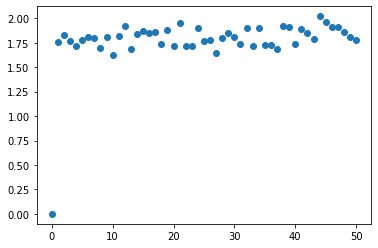

In [37]:
c1 = Country()

for j in range(Iterations):
    oneIteration(c1, verbose=False)
    
c1.printTopFinishes()
print(f"Top Cities = {all_args_max(c1.top_finishes)}")
print(c1.top_finishes)
means = [c1.top_finishes[i]/c1.cities_pops[i] for i in range(int(c1.n_cities))]
plt.scatter(x = range(len(c1.top_finishes)), y = means)